# How has the mainstream media's coverage of Covid-19 changed during the pandemic?
- ### Can an overall change in sentiment be seen?
- ### Has the topics changed over time?
- ### Can a change in positivity og negativity within publishers be seen?

In [1]:
import os.path
import pandas as pd
# make sure that the pickle directory exists, otherwise create it
if not os.path.exists("pickle/"):
    !mkdir 'pickle'
# read pickle with the dataset
data_df = pd.read_pickle('pickle/data_df.pkl')
# read pickle with with the cleaned dataset
data_clean = pd.read_pickle('pickle/data_clean_r4.pkl')

In [2]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.content)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aa,aal,aam,aba,aback,abacus,abalone,abandon,abandoned,abandonment,...,zoonosis,zoonotic,zorro,zoster,zowie,zucchini,zwanziger,zygomatic,αcoronavirus,βcoronavirus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_dtm = data_dtm.transpose()

In [4]:
# Find the top 30 words mentioned in each article
top_dict = {}
for c in data_dtm.iloc[:0].columns:
    top = data_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{0: [('cancer', 15),
  ('time', 7),
  ('didnt', 5),
  ('day', 5),
  ('life', 5),
  ('like', 5),
  ('story', 4),
  ('continued', 4),
  ('treatment', 4),
  ('diagnosis', 4),
  ('doctor', 4),
  ('recovery', 4),
  ('second', 4),
  ('lot', 4),
  ('round', 4),
  ('thought', 3),
  ('knew', 3),
  ('longer', 3),
  ('live', 3),
  ('need', 3),
  ('just', 3),
  ('surgeon', 3),
  ('surgery', 3),
  ('tell', 3),
  ('feeling', 3),
  ('received', 3),
  ('told', 3),
  ('god', 3),
  ('ovarian', 2),
  ('win', 2)],
 1: [('ginger', 40),
  ('health', 9),
  ('help', 8),
  ('nausea', 8),
  ('research', 7),
  ('effect', 6),
  ('included', 6),
  ('extract', 6),
  ('small', 5),
  ('used', 5),
  ('reduce', 5),
  ('learn', 5),
  ('free', 4),
  ('inflammation', 4),
  ('supplement', 4),
  ('body', 4),
  ('doe', 4),
  ('people', 4),
  ('pain', 4),
  ('medicine', 4),
  ('safe', 4),
  ('dosage', 3),
  ('possible', 3),
  ('reduced', 3),
  ('treatment', 3),
  ('remedy', 3),
  ('evidence', 3),
  ('cancer', 3),
  ('diet', 3

In [5]:
top_words_top_30 = {}
for k,v in top_dict.items():
    for word_count in v:
        key = word_count[0]
        value = word_count[1]
        if key not in top_words_top_30:
            top_words_top_30[key] = value
        else:
            top_words_top_30[key] += value
            
word_count = {k: v for k, v in sorted(top_words_top_30.items(), key=lambda item: item[1], reverse=True)}

In [6]:
from wordcloud import WordCloud

cloud = WordCloud(background_color="white", max_words=200)
cloud.fit_words(top_words_top_30)
cloud.to_file("word_cloud.png")

![Top 30 Words](word_cloud.png)

In [10]:
data_dtm_top_30 = data_dtm.transpose()[list(word_count)[:30]]

data_dtm_top_30_date = data_dtm_top_30.join(data_df.date)
data_dtm_top_30_date.date = pd.to_datetime(data_dtm_top_30_date.date).dt.strftime('%W')
data_dtm_top_30_date = data_dtm_top_30_date.groupby('date', as_index=False, sort=False).sum()

In [11]:
data_dtm_top_30_date.head()

,date,said,coronavirus,people,new,health,time,virus,day,government,...,just,work,like,public,market,march,crisis,financial,global,business
0,00,2,0,5,0,10,9,1,7,0,...,3,2,6,0,0,0,0,0,0,0
1,01,16,9,52,7,39,6,12,14,2,...,0,9,3,5,2,0,0,0,9,1
2,02,49,26,23,41,51,4,38,7,3,...,1,2,4,12,9,0,4,0,10,0
3,03,1642,1392,1253,931,1098,288,1435,389,240,...,203,100,180,437,372,23,107,67,361,63
4,04,3678,2936,1731,1366,1858,740,2042,881,603,...,437,327,381,558,739,162,170,279,897,350


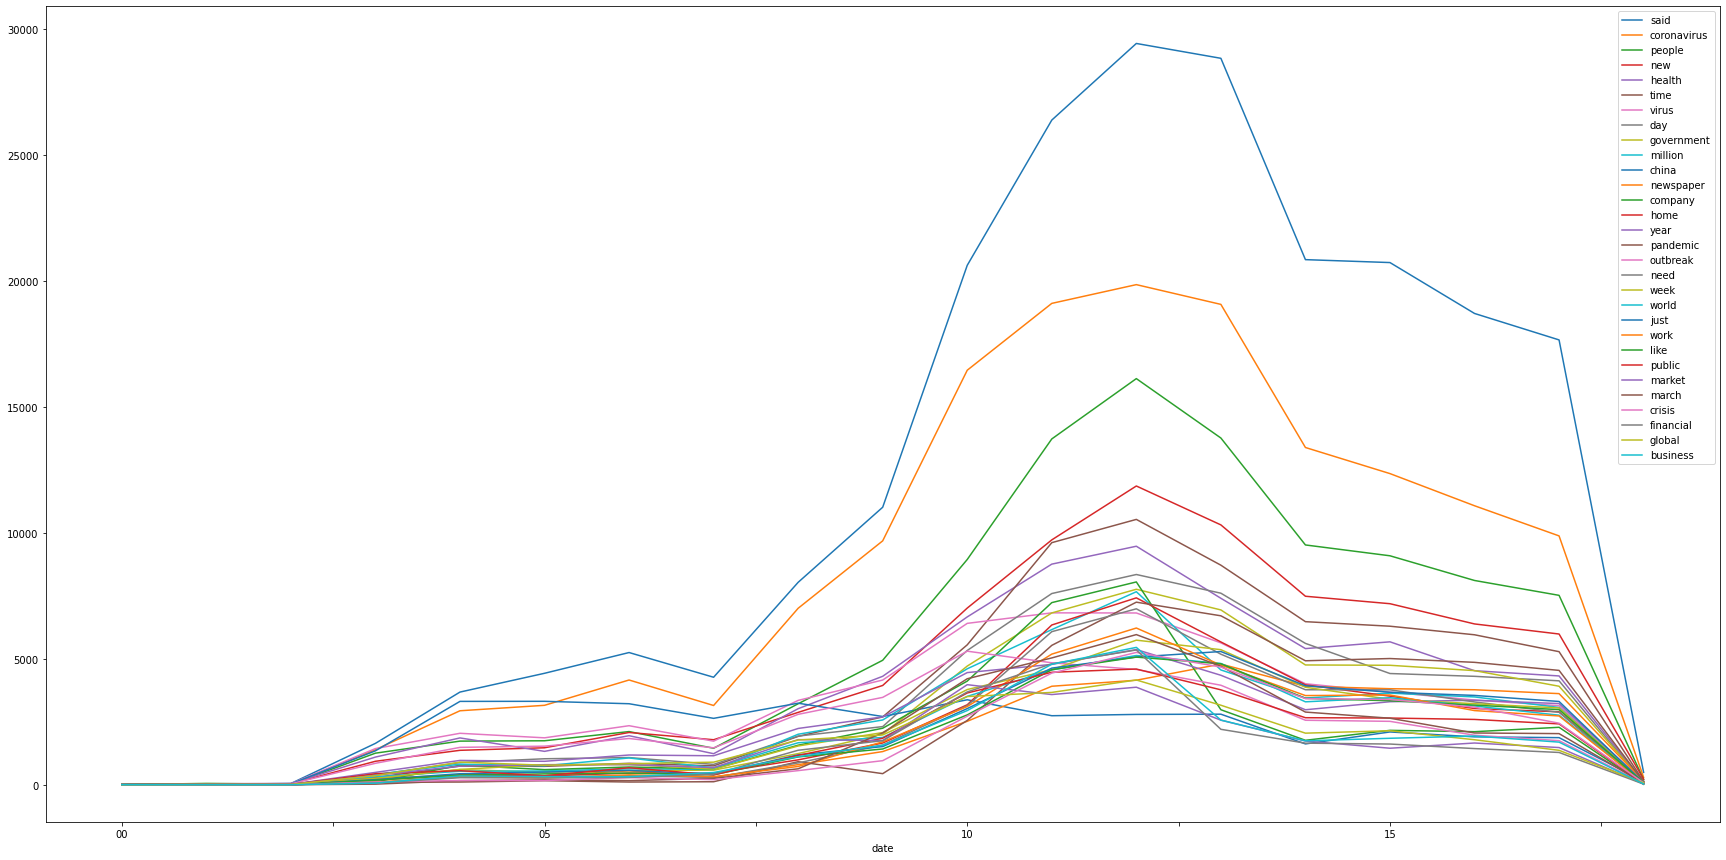

In [12]:
import matplotlib.pyplot as plt
    
data_dtm_top_30_date.plot(kind='line',x='date', figsize=(30,15))

plt.show()